# An introduction to Word2Vec 

Word2Vec is a widely used algorithm in natural language processing that is designed to generate word embeddings, which are dense vector representations of words. These embeddings capture the semantic and syntactic relationships between words by learning from large amounts of text data. The key idea behind Word2Vec is that words with similar meanings or contexts should have similar vector representations. This approach enables us to represent words as numerical vectors in a continuous vector space, facilitating various downstream tasks such as word similarity, text classification, and language generation. The training process involves a neural network model that predicts the context words given a target word or vice versa. By iteratively updating the model parameters based on these predictions, Word2Vec learns to generate meaningful and informative word embeddings. The resulting embeddings enable us to perform complex operations on words, such as calculating similarities, finding analogies, or clustering words based on their semantic relationships. Overall, Word2Vec provides a powerful and efficient way to transform words into continuous vector representations, unlocking a wide range of possibilities for understanding and working with textual data.

# Some basics first
The code implements a word_tokenize function that splits a given text into individual words or tokens. It uses a loop to iterate through each character in the text, checks if the character is a whitespace or punctuation mark, and appends the current token to a list if it is not empty. The function returns the list of tokens. A sample text is provided to demonstrate the function's usage and print the resulting tokens.

In [12]:
# Lets start implementation from the begining and recall the basics:



import string

def word_tokenize(text):
    tokens = []  # List to store the tokens
    current_token = ""  # Variable to store the characters of the current token
    
    # Iterate through each character in the text
    for char in text:
        if char not in string.whitespace and char not in string.punctuation:
            # If the character is not whitespace or punctuation, add it to the current token
            current_token += char
        elif current_token:
            # If the current token is not empty, add it to the list of tokens
            tokens.append(current_token)
            current_token = ""  # Reset the current token
    
    if current_token:
        # Add the last token to the list of tokens if it is not empty
        tokens.append(current_token)
    
    return tokens


# Testing the word_tokenize function
text = "Natural Language Processing (NLP) is a subfield of artificial intelligence (AI) that focuses on the interaction between computers and humans using natural language."
tokens = word_tokenize(text)
print(tokens)

['Natural', 'Language', 'Processing', 'NLP', 'is', 'a', 'subfield', 'of', 'artificial', 'intelligence', 'AI', 'that', 'focuses', 'on', 'the', 'interaction', 'between', 'computers', 'and', 'humans', 'using', 'natural', 'language']


In [2]:
text = "Hello, how are you today?"
tokens = word_tokenize(text)
print(tokens)
# Output: ['Hello', 'how', 'are', 'you', 'today']

['Hello', 'how', 'are', 'you', 'today']


In [3]:
from collections import Counter

# Tokenization and vocabulary building
def tokenize_corpus(corpus):
    tokenized_corpus = [sentence.lower().split() for sentence in corpus]
    return tokenized_corpus

def build_vocab(tokenized_corpus):
    word_counts = Counter()
    for sentence in tokenized_corpus:
        word_counts.update(sentence)

    vocabulary = [word for word, _ in word_counts.most_common()]
    word2idx = {word: idx for idx, word in enumerate(vocabulary)}
    idx2word = {idx: word for idx, word in enumerate(vocabulary)}

    return vocabulary, word2idx, idx2word

In [4]:
corpus = [
    "I like to eat pizza",
    "Pizza is delicious",
    "I enjoy eating burgers",
    "Burgers are tasty"
]

# Tokenize the corpus
tokenized = tokenize_corpus(corpus)
print(tokenized)

# Build vocabulary
vocabulary, word2idx, idx2word = build_vocab(tokenized)
print(vocabulary)



[['i', 'like', 'to', 'eat', 'pizza'], ['pizza', 'is', 'delicious'], ['i', 'enjoy', 'eating', 'burgers'], ['burgers', 'are', 'tasty']]
['i', 'pizza', 'burgers', 'like', 'to', 'eat', 'is', 'delicious', 'enjoy', 'eating', 'are', 'tasty']


In [5]:
def extract_unique_words(corpus):
    unique_words = set()
    
    for sentence in corpus:
        # Tokenize the sentence into words
        words = sentence.split()
        
        # Add the words to the set of unique words
        unique_words.update(words)
    
    return unique_words


# Example usage:
corpus = [
    "I like to eat pizza",
    "Pizza is delicious",
    "I enjoy eating burgers",
    "Burgers are tasty"
]

# Extract the set of unique words from the corpus
unique_words = extract_unique_words(corpus)

# Print the set of unique words
print(unique_words)

{'burgers', 'Burgers', 'eat', 'eating', 'like', 'to', 'is', 'pizza', 'are', 'enjoy', 'tasty', 'Pizza', 'delicious', 'I'}


# The Skip-Gram model

The Skip-gram model is a type of word2vec model that aims to learn word embeddings by predicting the context words given a target word. In the code, each sentence in the corpus is tokenized, and for each target word, the surrounding context words within a window size are extracted. This approach aligns with the Skip-gram model's objective of capturing the context information for each target word.

The following code constructs a small corpus of sentences. Each sentence represents a piece of text. The goal is to extract the words and their corresponding context from each sentence. The context refers to the words surrounding the target word within a specific window size.

The code initializes two lists, words and labels, to store the target words and their respective context words. It then iterates over each sentence in the corpus and tokenizes the sentence into individual words. For each word in a sentence, it extracts the target word and its left and right context words based on the window size.

The target word is added to the words list, while the context words are added to the labels list as a list of words. Finally, the code creates a DataFrame using the words and labels lists, with the columns "Word" and "Context" respectively, and prints the resulting DataFrame.

The DataFrame represents the extracted words and their corresponding context in a tabular format, where each row contains a target word and its associated context words.

In [13]:
import pandas as pd

# Constructing a small corpus
# corpus = [
#     "The man walked down the street.",
#     "The woman ran in the park.",
#     "The man and woman danced together.",
#     "A group of men and women gathered for a meeting.",
#     "The man and woman smiled at each other.",
#     "Both the man and woman played music.",
#     "The man and woman enjoyed a picnic in the garden.",
#     "Men and women worked side by side in the office.",
#     "The man and woman held hands as they strolled along the beach.",
#     "Both the man and woman laughed at the funny movie.",
#     "Monday is the start of the workweek.",
#     "She has a meeting scheduled for Tuesday.",
#     "We are planning a trip for Wednesday next week.",
#     "Thursday is her favorite day of the week.",
#     "They went to a concert on Friday night.",
#     "I always enjoy relaxing on Saturdays.",
#     "Sunday mornings are perfect for a brunch with friends.",
#     "In January, we usually experience cold temperatures.",
#     "The festival will take place in February.",
#     "She is looking forward to her birthday in March.",
#     "The cherry blossoms bloom beautifully in April.",
#     "May is a great time to go hiking.",
#     "The summer heat starts to kick in during June.",
#     "They have a family reunion planned for July.",
#     "She loves the colors of the leaves in October.",
#     "November brings a sense of gratitude and reflection.",
#     "December is filled with holiday celebrations.",
#     "He is going on a year-long trip around the world.",
#     "They meet up every other week for a study group.",
#     "The deadline for the project is just a few days away.",
#     "She enjoys spending her weekends at the beach."
# ]

corpus =['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']


# Initialize lists to store words and labels
words = []
labels = []

# Window size for context
window_size = 2

# Iterate over each sentence in the corpus
for sentence in corpus:
    # Tokenize the sentence into words
    tokenized_sentence = sentence.split()
    
    # Iterate over each word in the sentence
    for i in range(len(tokenized_sentence)):
        # Get the target word
        target_word = tokenized_sentence[i]
        
        # Get the left and right context words within the window size
        context_words = tokenized_sentence[max(0, i - window_size): i] + tokenized_sentence[i+1: i+window_size+1]
        
        # Add the target word and its context words to the lists
        words.append(target_word)
        labels.append(context_words)

# Create a DataFrame from the words and labels lists
df = pd.DataFrame({'Word': words, 'Context': labels})

# Print the DataFrame
print(df)

        Word                       Context
0       king                       [is, a]
1         is             [king, a, strong]
2          a       [king, is, strong, man]
3     strong                  [is, a, man]
4        man                   [a, strong]
5      queen                       [is, a]
6         is              [queen, a, wise]
7          a      [queen, is, wise, woman]
8       wise                [is, a, woman]
9      woman                     [a, wise]
10       boy                       [is, a]
11        is               [boy, a, young]
12         a         [boy, is, young, man]
13     young                  [is, a, man]
14       man                    [a, young]
15      girl                       [is, a]
16        is              [girl, a, young]
17         a      [girl, is, young, woman]
18     young                [is, a, woman]
19     woman                    [a, young]
20    prince                       [is, a]
21        is            [prince, a, young]
22         

# Word2Vec
The code implements the Word2Vec model, which is a popular technique for representing words as numerical vectors. Word2Vec captures the semantic and syntactic relationships between words by learning vector representations from large amounts of text data.

The Word2Vec model has two main components: an encoder and a decoder. The encoder takes a word as input and converts it into a lower-dimensional vector representation, often called a word embedding. This embedding represents the meaning or context of the word in a continuous vector space.

The encoder is trained to encode words in such a way that words with similar meanings or contexts are closer to each other in the vector space. This allows the model to capture the semantic relationships between words. The decoder, on the other hand, reconstructs the original word from its embedding.

In the provided code, a vocabulary is created from a given corpus, which is a collection of text data. The vocabulary consists of all unique words present in the corpus. This vocabulary serves as the basis for training the Word2Vec model.

The code also sets the dimensions for the word embeddings. These dimensions determine the size of the vector representation for each word. By specifying a higher-dimensional embedding space, the model can potentially capture more nuanced relationships between words.

The code demonstrates the usage of the Word2Vec model by creating an instance of a model trainer, which combines the Word2Vec model with a decoder. It also sets up the necessary components for training the model, such as the loss function and optimizer.

Overall, the code provides a framework for training a Word2Vec model to learn meaningful word embeddings from text data. These embeddings can then be used for various natural language processing tasks, such as word similarity, document classification, or language generation.

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim


class Word2Vec(nn.Module):
    def __init__(self, input_dim, embedding_dim):
        super(Word2Vec, self).__init__()
        self.encoder = nn.Linear(input_dim, embedding_dim)    
    def forward(self, x):
        encoded = self.encoder(x)
        return encoded


class Word2VecModelTrainer(nn.Module):
    def __init__(self, input_dim, embedding_dim):
        super(Word2VecModelTrainer, self).__init__()
        self.word2vec = Word2Vec(input_dim, embedding_dim)
        self.decoder = nn.Linear(embedding_dim, input_dim)
    
    def forward(self, x,inference=False):
        if not inference:
          encoded = self.word2vec(x)
          decoded = self.decoder(encoded)
          return decoded
        else:
          return self.word2vec(x)


# Create vocabulary from the corpus
vocab = list(set([word.lower() for sentence in corpus for word in sentence.split()]))


# Example usage
input_dim = len(vocab)

embedding_dim = 5  # Dimension of the embedding

# Create an instance of the autoencoder
model = Word2VecModelTrainer(input_dim, embedding_dim)

# Define the loss function
loss_function = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.05)






# The details of training Word2Vec Model 

In the provided training loop, the inputs (x) and targets (y) are chosen in a specific way to train the Word2Vec model effectively.

In the Word2Vec model, the objective is to learn word embeddings that capture the context of words. The context of a word is defined by the words that appear around it in a given corpus. To capture this context, the training loop uses a sliding window approach.

Here's how it works:

* For each sentence in the corpus, the training loop generates a list of words. These words serve as the input data (x) for the model.

* The training loop then creates pairs of target words (y) and context words based on a fixed window size. For example, if the window size is set to 3, each target word will have three context words on the left and three context words on the right. This window slides through the sentence, generating multiple pairs of target-context words.

* The pairs of target-context words are used to train the Word2Vec model. The model takes the target word (x) as input and predicts the context word (y). The objective is to minimize the difference between the predicted context word and the actual context word.

* By training the model to predict context words given target words, the Word2Vec model learns to capture the relationships and similarities between words. Words that often appear in similar contexts will have similar embeddings, allowing the model to represent their semantic or syntactic relationships.

* Choosing x as the target word and y as the context word follows the Skip-gram architecture of Word2Vec. The Skip-gram model aims to maximize the likelihood of predicting the surrounding context words based on the given target word. This approach has been shown to be effective in learning high-quality word embeddings.

In summary, by selecting the target words as input (x) and the corresponding context words as targets (y), the training loop sets up the Word2Vec model to learn embeddings that capture the context and relationships between words in a given corpus.

In [8]:

import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

additional_words = ['a', 'an', 'the', 'in']
stopwords_set = set(stopwords.words('english'))
stopwords_set
# One-hot encoding function
def one_hot_encode(word, vocab):
    encoding = torch.zeros(len(vocab))
    encoding[vocab.index(word)] = 1
    return encoding



# Training loop
num_epochs = 200

for epoch in range(num_epochs):

    # Training loop
    for sentence in corpus:
        # Tokenize the sentence into words
        tokenized_sentence = sentence.lower().split()
        tokenized_sentence = [word for word in tokenized_sentence if word not in stopwords_set and word not in additional_words]


        # Iterate over each word in the sentence
        for i, word in enumerate(tokenized_sentence):
            # Skip words not in the vocabulary
            if word not in vocab:
                continue

            # Convert the word to one-hot encoding
            x = one_hot_encode(word, vocab)

            # Get the context words within the window size
            context_words = tokenized_sentence[max(0, i - window_size):i] + tokenized_sentence[i+1:i+window_size+1]

            # Iterate over each context word
            for context_word in context_words:
                # Skip context words not in the vocabulary
                if context_word not in vocab:
                    continue

                # Convert the context word to one-hot encoding
                y = one_hot_encode(context_word, vocab)

                # Forward pass
                output = model(x)

                # Compute the loss
                loss = loss_function(output, y)
                loss_= loss.item()

                # Backward pass and optimization
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

    print(f"Epoch {epoch+1}: Loss = {loss_:.4f}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1: Loss = 2.9967
Epoch 2: Loss = 3.0298
Epoch 3: Loss = 3.0270
Epoch 4: Loss = 2.9949
Epoch 5: Loss = 2.9446
Epoch 6: Loss = 2.8866
Epoch 7: Loss = 2.8273
Epoch 8: Loss = 2.7699
Epoch 9: Loss = 2.7155
Epoch 10: Loss = 2.6645
Epoch 11: Loss = 2.6178
Epoch 12: Loss = 2.5762
Epoch 13: Loss = 2.5410
Epoch 14: Loss = 2.5127
Epoch 15: Loss = 2.4915
Epoch 16: Loss = 2.4769
Epoch 17: Loss = 2.4680
Epoch 18: Loss = 2.4637
Epoch 19: Loss = 2.4629
Epoch 20: Loss = 2.4644
Epoch 21: Loss = 2.4674
Epoch 22: Loss = 2.4713
Epoch 23: Loss = 2.4757
Epoch 24: Loss = 2.4802
Epoch 25: Loss = 2.4847
Epoch 26: Loss = 2.4890
Epoch 27: Loss = 2.4931
Epoch 28: Loss = 2.4971
Epoch 29: Loss = 2.5008
Epoch 30: Loss = 2.5043
Epoch 31: Loss = 2.5076
Epoch 32: Loss = 2.5107
Epoch 33: Loss = 2.5134
Epoch 34: Loss = 2.5158
Epoch 35: Loss = 2.5177
Epoch 36: Loss = 2.5192
Epoch 37: Loss = 2.5202
Epoch 38: Loss = 2.5207
Epoch 39: Loss = 2.5206
Epoch 40: Loss = 2.5200
Epoch 41: Loss = 2.5188
Epoch 42: Loss = 2.5170
E

In [9]:
import numpy as np

# Function to embed words in 2D
def embed_words(model, vocab):
    embeddings = []
    
    # Iterate over each word in the vocabulary
    for word in vocab:
        # Convert the word to one-hot encoding
        x = one_hot_encode(word, vocab)
        
        # Perform forward pass through the autoencoder
        embedding = model.word2vec(x).detach().numpy()
        embeddings.append(embedding)
    
    return np.array(embeddings)

# Example usage
word_embeddings = embed_words(model, vocab)

# Print the word embeddings
for word, embedding in zip(vocab, word_embeddings):
    print(f"Word: {word}\tEmbedding: {embedding}")

Word: strong	Embedding: [-2.107132   -0.10360259  0.5162208  -0.02196065 -2.4401894 ]
Word: is	Embedding: [ 0.48701954  0.18305808 -0.12094049  0.4860332  -0.4623993 ]
Word: will	Embedding: [ 0.57932985  0.525712   -0.14588885  0.2660238  -0.7010566 ]
Word: a	Embedding: [ 0.28353202  0.18531516 -0.03012578  0.6643554  -0.5734613 ]
Word: be	Embedding: [ 0.45541757  0.6261656   0.02650623  0.538318   -0.42449644]
Word: queen	Embedding: [ 1.0296427   0.5204669  -0.13931148 -0.84136915  1.185693  ]
Word: young	Embedding: [ 0.28502005  1.7396141  -0.77752984 -0.7706263  -1.7760415 ]
Word: boy	Embedding: [-0.80216515  0.9185308   1.253925    0.8180847  -1.0439075 ]
Word: woman	Embedding: [ 1.2655801e+00 -1.3711737e+00  1.2331371e+00  1.0979474e-03
 -1.5045059e-01]
Word: king	Embedding: [-1.4153827   1.2239678   0.27378684  0.36503237  0.7413472 ]
Word: man	Embedding: [-1.0976586  -0.21188176 -0.71776915  2.000411    0.51304114]
Word: princess	Embedding: [ 1.2944089  -0.32903665  1.2005699   

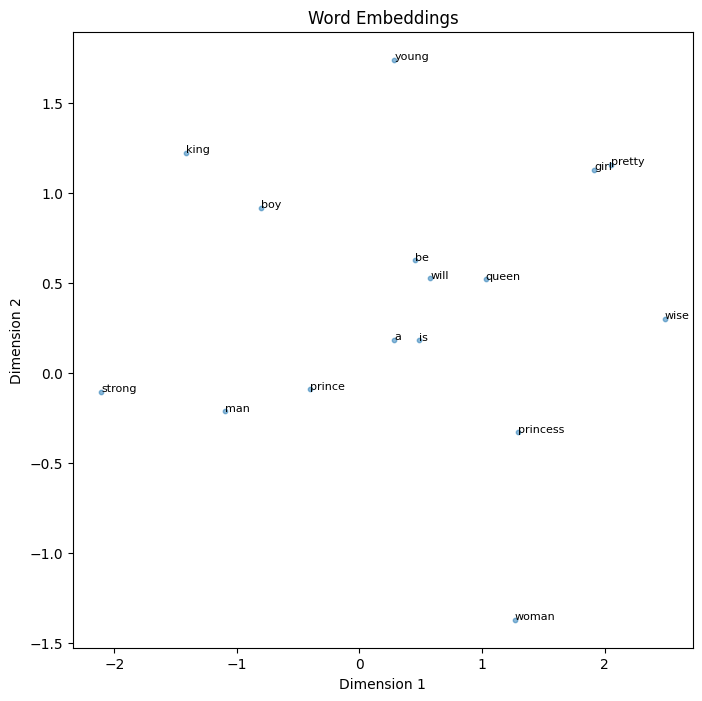

['strong',
 'is',
 'will',
 'a',
 'be',
 'queen',
 'young',
 'boy',
 'woman',
 'king',
 'man',
 'princess',
 'pretty',
 'wise',
 'prince',
 'girl']

In [11]:
import random
import matplotlib.pyplot as plt

# Function to plot word embeddings in 2D
def plot_word_embeddings(embeddings, vocab, num_words=10):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Randomly select a subset of words from the vocabulary
    if num_words> len(vocab):
      num_words= len(vocab)
    selected_words = random.sample(vocab, num_words)
    
    # Get the corresponding indices of the selected words in the vocabulary
    selected_indices = [vocab.index(word) for word in selected_words]
    
    # Get the embeddings for the selected words
    selected_embeddings = embeddings[selected_indices]
    
    # Decrease the dot size by modifying the 's' parameter
    ax.scatter(selected_embeddings[:, 0], selected_embeddings[:, 1], alpha=0.5, s=10)
    
    # Annotate each point with the corresponding word
    for i, word in enumerate(selected_words):
        ax.annotate(word, (selected_embeddings[i, 0], selected_embeddings[i, 1]), fontsize=8)
    
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Word Embeddings")
    plt.show()

# Example usage
plot_word_embeddings(word_embeddings, vocab, num_words=len(vocab))
vocab
